# Kurapati Venkatesh
# 09012021
# Topic: Principal Component Analysis

# ---------------------------------------------------------------------------

## A Pharmaceutical drug manufacturing company is studying on a new medicine to treat Heart diseases, it has gathered data from its secondary sources, and it would like you to provide high level analytical insights on the data, its aim is to segregate patients depending on their age group and other factors as given in the data, perform PCA and Clustering Machine learning Algorithm on the dataset given, and check if the clusters formed before and after PCA are same and provide a brief report on your model. You can also explore more on ways to improve your model. 

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To segregate patients depending on their age group and other factors as given in the data.

### PCA objectives:
#### PCA helps in Dimensionality reduction. Converts set of correlated variables to non-correlated variables. It finds a sequence of linear combinations of variables.

### PCA Benifits:
#### Principal Component Analysis (PCA) is a well-established mathematical technique for reducing the dimensionality of data, while keeping as much variation as possible. PCA achieves dimension reduction by creating new, artificial variables called principal components

### Advantages of Principal Component Analysis:

1. Removes Correlated Features
2. Improves Algorithm Performance
3. Reduces Overfitting
4. Improves Visualization
5. Independent variables become less interpretable
6. Data standardization is must before PCA
7. Information Loss

## -------------------------------------------------------------------------------------------

##### Data Set Information:

##### This database contains 14 attributes. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

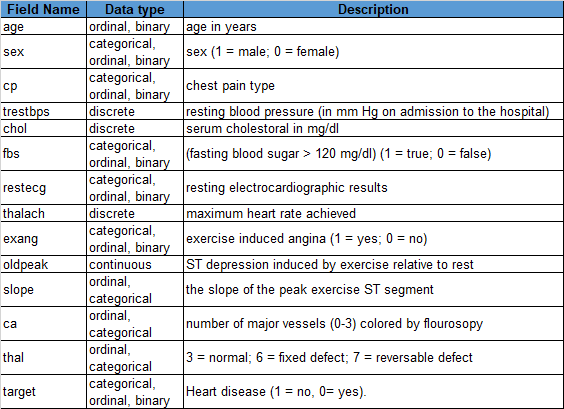

## ---------------------------------------------------------------------------------------------------------------------------

In [1]:
#importing libraries
import seaborn as sns # for data visualization
import pandas as pd # for data analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization

##### Load the dataset

In [70]:
hd = pd.read_csv("G:/360digit/assignments meterial/PCA/heart disease.csv")
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


This dataset has no null values

### ----------------------------------------------EDA---------------------------------------------------

###### Detectecting outliers via boxplot

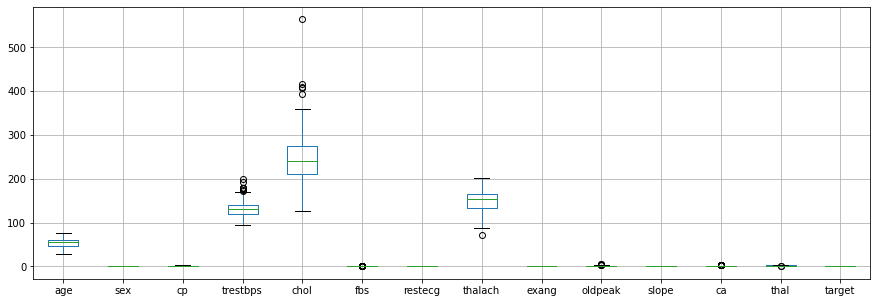

In [4]:
hd.boxplot(figsize=(15,5))

Looking at the box plot, it seems that the variables trestbps, chol, thalach, oldpeak columns have outlier present in the variables. These outliers value needs to be teated. Categorical columns are not considered for this process

### Outliers Treatment:

In [5]:
# create a user defined function remove_ol for getting the threshold value from IQR. 
def remove_ol(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

#### trestbps:

In [6]:
low, up = remove_ol(hd['trestbps'])
hd['trestbps'] = np.where(hd['trestbps'] > up, up, hd['trestbps']) 
hd['trestbps'] = np.where(hd['trestbps'] < low, low, hd['trestbps']) 

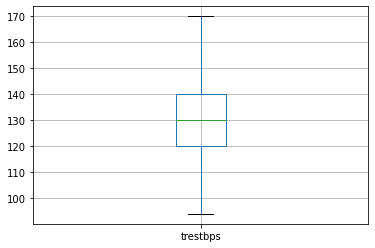

In [7]:
hd.boxplot(['trestbps'])

#### chol :

In [8]:
low, up = remove_ol(hd['chol'])
hd['chol'] = np.where(hd['chol'] > up, up, hd['chol']) 
hd['chol'] = np.where(hd['chol'] < low, low, hd['chol']) 

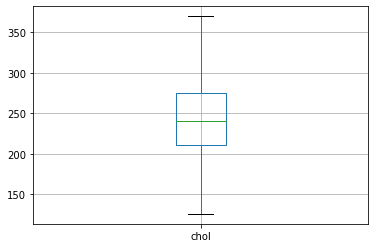

In [9]:
hd.boxplot(['chol'])

####  thalach:

In [10]:
low, up = remove_ol(hd['thalach'])
hd['thalach'] = np.where(hd['thalach'] > up, up, hd['thalach']) 
hd['thalach'] = np.where(hd['thalach'] < low, low, hd['thalach']) 

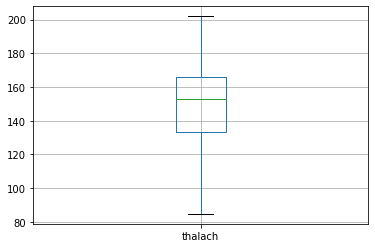

In [11]:
hd.boxplot('thalach')

#### oldpeak:

In [12]:
low, up = remove_ol(hd['oldpeak'])
hd['oldpeak'] = np.where(hd['oldpeak'] > up, up, hd['oldpeak']) 
hd['oldpeak'] = np.where(hd['oldpeak'] < low, low, hd['oldpeak'])

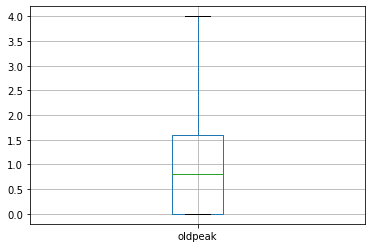

In [13]:
hd.boxplot('oldpeak')

##### Histogram Analysis:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C88FC45190>,
      dtype=object)

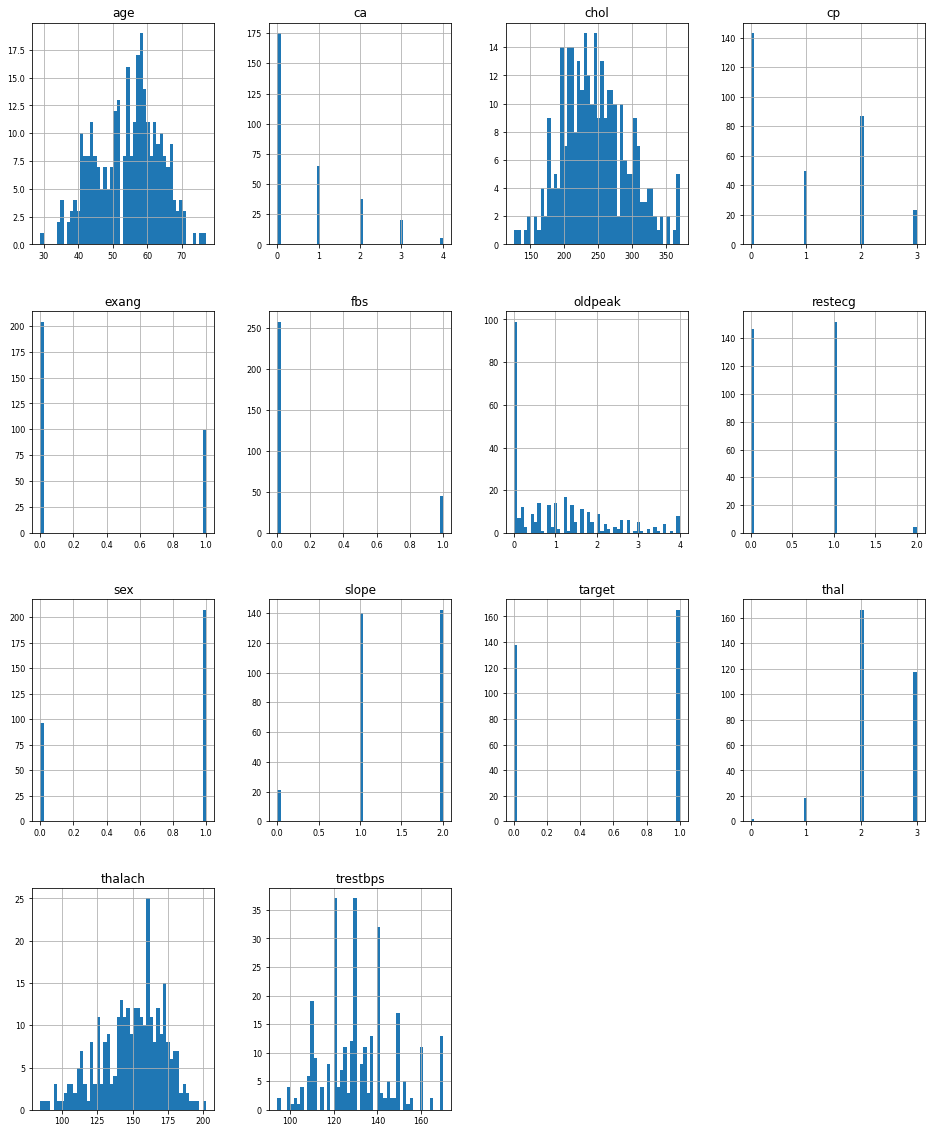

In [14]:
hd.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

##### Corelation Analysis:

In [15]:
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.286134,0.205856,0.121308,-0.116211,-0.398246,0.096801,0.213242,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.047594,-0.180779,0.045032,-0.058196,-0.042937,0.141664,0.105256,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.056267,-0.094081,0.094444,0.044421,0.295748,-0.394280,-0.144957,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.286134,-0.047594,0.056267,1.000000,0.132934,0.168393,-0.116535,-0.053717,0.055354,0.180601,-0.113723,0.102909,0.050339,-0.138621
chol,0.205856,-0.180779,-0.094081,0.132934,1.000000,0.015189,-0.140696,-0.019543,0.083809,0.057323,0.005704,0.077680,0.089103,-0.103987
fbs,0.121308,0.045032,0.094444,0.168393,0.015189,1.000000,-0.084189,-0.009455,0.025665,0.011732,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.116535,-0.140696,-0.084189,1.000000,0.046196,-0.070733,-0.062437,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398246,-0.042937,0.295748,-0.053717,-0.019543,-0.009455,0.046196,1.000000,-0.382586,-0.351496,0.387921,-0.215944,-0.098070,0.422210
exang,0.096801,0.141664,-0.394280,0.055354,0.083809,0.025665,-0.070733,-0.382586,1.000000,0.299565,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.213242,0.105256,-0.144957,0.180601,0.057323,0.011732,-0.062437,-0.351496,0.299565,1.000000,-0.573853,0.218187,0.208407,-0.436680


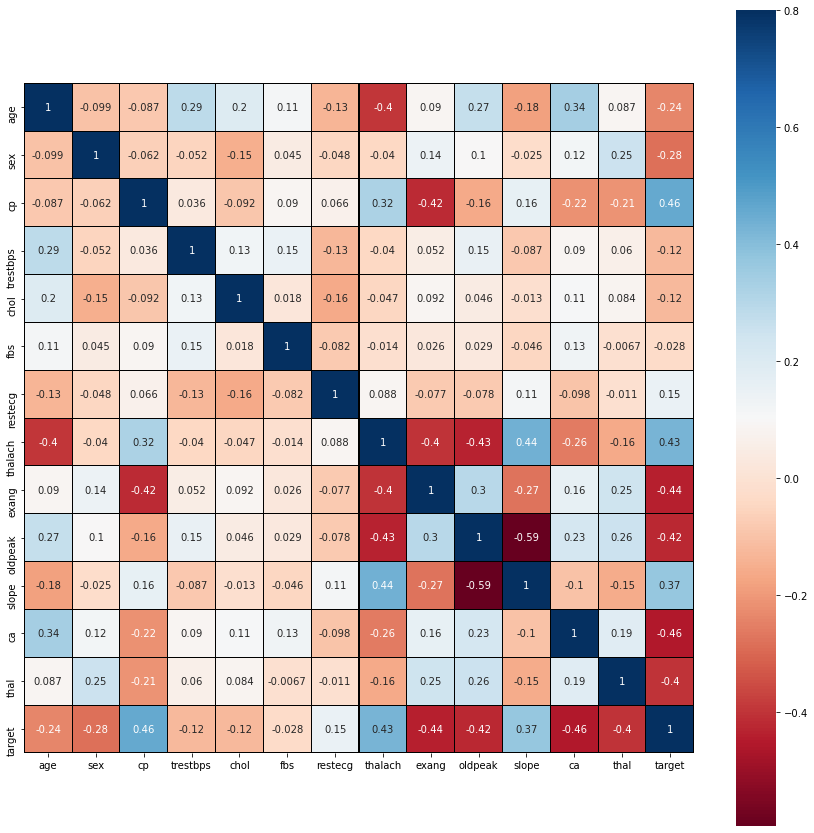

In [16]:
corr = hd.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax = 0.8, linewidths = 0.01, square = True, annot = True, cmap='RdBu', linecolor='black')

There is no strong correlation is observed from the above plot

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

### Normalization function 

In [18]:
hd_normal = scale(hd)
hd_normal

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 0.29046364, -1.46841752,  0.03203122, ...,  0.26508221,
        -0.51292188, -1.09345881]])

In [19]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(hd_normal)

The amount of variance that each PCA explains is - 

In [20]:
var = pca.explained_variance_ratio_
var

array([0.23639398, 0.11183755, 0.08780436, 0.08673224, 0.07216791,
       0.06891891])

###### The PCA Components:

In [21]:
pca.components_
pca.components_[0]

array([ 0.25375641,  0.12359551, -0.27372094,  0.14180929,  0.1002266 ,
        0.05300221, -0.11238885, -0.3681197 ,  0.33687872,  0.37062034,
       -0.32324675,  0.26090491,  0.22101592, -0.43823083])

###### Cumulative variance

In [22]:
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([23.64, 34.82, 43.6 , 52.27, 59.49, 66.38])

###### Variance plot for PCA components obtained :

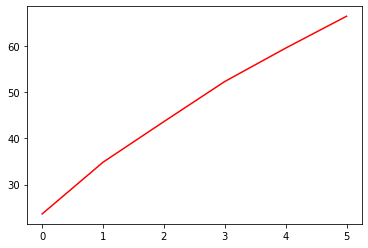

In [23]:
plt.plot(var1, color = "red")

##### PCA scores:

In [24]:
pca_values

array([[-2.23938186e-02,  2.70524858e+00,  1.05543905e+00,
         3.45388722e+00,  6.13600776e-01,  1.57745915e+00],
       [-7.76623676e-01, -7.62527849e-01, -7.93850902e-02,
         2.79665677e+00,  2.04670269e+00, -1.11182332e+00],
       [-2.05783076e+00, -6.97673240e-02, -5.06275348e-01,
         1.46406940e-01,  9.60760803e-01,  6.36544184e-01],
       ...,
       [ 2.70986169e+00,  6.57334045e-01,  1.82745507e+00,
         1.28745738e+00, -1.55418535e+00, -9.47663724e-01],
       [ 2.15033897e+00, -2.16046734e+00, -2.19536130e-03,
         1.02101863e+00, -1.31560024e+00, -1.71963134e-01],
       [-3.82108862e-01,  7.80935237e-01, -4.24090549e-01,
        -4.03670348e-01,  3.08105351e-01,  5.16683771e-01]])

In [25]:
pca_data = pd.DataFrame(pca_values) 
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5"
final = pd.concat([hd, pca_data.iloc[:, 0:2]], axis = 1)

#The first principal component explains 79% of the variability, and the second principal component explains 12%. 
#Together, the first two principal components explain 91% of the variability.

##### Scatter diagram:

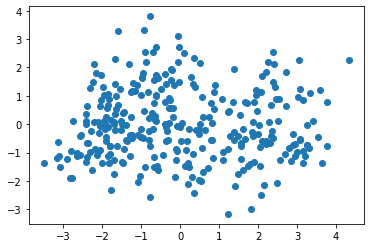

In [26]:
import matplotlib.pylab as plt
plt.scatter(x = final.comp0, y = final.comp1)

#### Hierarchial clustering:

In [27]:
# for creating dendrogram 
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

In [28]:
z = linkage(final, method = "complete", metric = "euclidean")

##### Dendrogram:

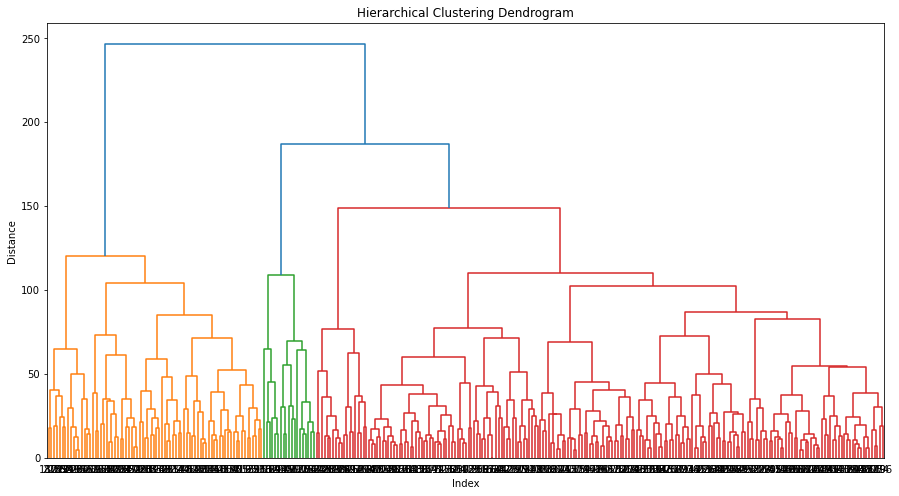

In [29]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

The optimal number of clusters obtained through Hierarchieal clustering is 3

Now applying AgglomerativeClustering choosing 3 as clusters from the above dendrogram

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
h_complete = AgglomerativeClustering(n_clusters = 2, linkage = 'complete', affinity = "euclidean").fit(pca_values) 
h_complete.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,

#### K-means:##

In [32]:
import pandas as pd
import matplotlib.pylab as plt

#### scree plot or elbow curve:

In [33]:
TWSS = []
k = list(range(2, 10))

In [34]:
from sklearn.cluster import KMeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca_values)
    TWSS.append(kmeans.inertia_)
    
TWSS

[2060.0236148287045,
 1822.3073893722124,
 1643.4009702254966,
 1526.1325962901494,
 1419.707018175144,
 1353.6707692629893,
 1276.176185653961,
 1218.5380378100406]

Text(0, 0.5, 'total_within_SS')

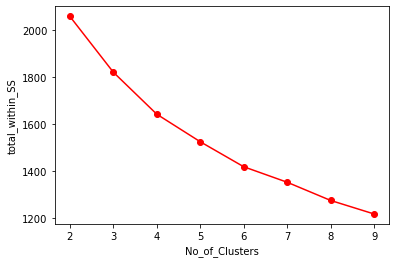

In [35]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

##### Selecting 4 clusters from the above scree plot which is the optimum number of clusters 

In [36]:
model = KMeans(n_clusters = 4)
model.fit(pca_values)

KMeans(n_clusters=4)

In [37]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
mb

0      2
1      2
2      1
3      1
4      3
      ..
298    0
299    1
300    0
301    0
302    3
Length: 303, dtype: int32

##### In both Hierarchical and k-means clustering, we got the different no of clusters by using the first two principal component scores (which represents the 91% of the orginal data). Now let's check the both Hierarchical and k-means clustering for original data, And compare the both results for optimum no of clusters.

## Clustering for orginal data:

#### Normalization function: 

In [38]:
def norm_func(i):
    x = (i - i.min())	/ (i.max() - i.min())
    return (x)

### Hierarchial clustering

Normalized data frame (considering the numerical part of data)

In [39]:
df_norm = norm_func(hd.iloc[:, 1:])
df_norm.describe()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.322332,0.490533,0.488757,0.148515,0.264026,0.553878,0.326733,0.256106,0.699670,0.182343,0.771177,0.544554
std,0.466011,0.344017,0.218187,0.195089,0.356198,0.262930,0.194132,0.469794,0.277532,0.308113,0.255652,0.204092,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.342105,0.348718,0.000000,0.000000,0.415778,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,1.000000,0.333333,0.473684,0.467692,0.000000,0.500000,0.582090,0.000000,0.200000,0.500000,0.000000,0.666667,1.000000
75%,1.000000,0.666667,0.605263,0.609231,0.000000,0.500000,0.692964,1.000000,0.400000,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# for creating dendrogram 
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

In [41]:
z = linkage(df_norm, method = "complete", metric = "euclidean")

### Dendrogram:

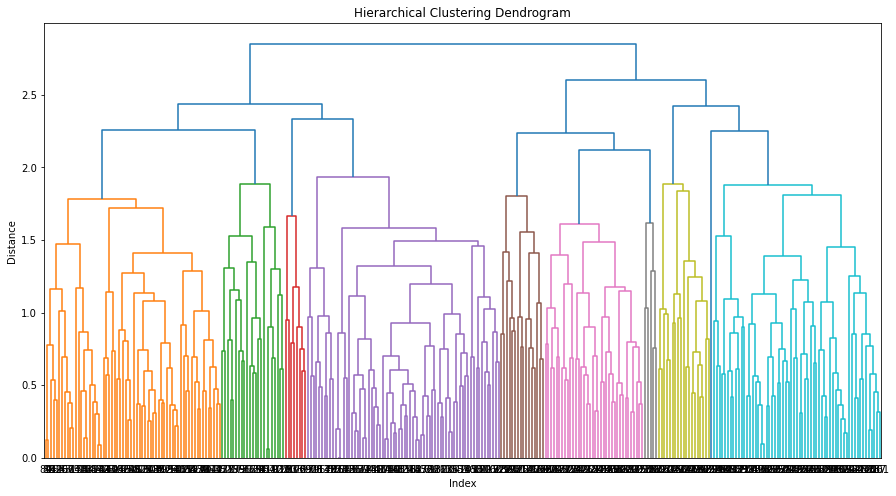

In [42]:
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

##### Now applying AgglomerativeClustering choosing 9 as clusters from the above dendrogram

In [71]:
from sklearn.cluster import AgglomerativeClustering

In [72]:
h_complete = AgglomerativeClustering(n_clusters = 9, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_

array([5, 5, 6, 1, 3, 1, 6, 1, 1, 1, 1, 6, 1, 3, 6, 6, 6, 6, 1, 6, 1, 3,
       1, 3, 3, 6, 1, 1, 6, 5, 6, 1, 1, 1, 3, 3, 6, 1, 6, 6, 6, 1, 3, 6,
       1, 1, 1, 1, 6, 6, 6, 1, 1, 6, 6, 1, 1, 1, 1, 6, 6, 1, 1, 1, 1, 6,
       3, 6, 1, 6, 1, 3, 1, 3, 6, 6, 5, 3, 1, 3, 1, 1, 6, 5, 6, 6, 1, 1,
       6, 6, 1, 3, 1, 3, 6, 3, 6, 1, 1, 1, 1, 5, 6, 5, 1, 6, 5, 3, 6, 6,
       3, 1, 6, 1, 1, 6, 1, 1, 6, 3, 6, 1, 3, 6, 6, 6, 1, 6, 6, 3, 6, 6,
       1, 1, 6, 6, 6, 1, 3, 3, 6, 1, 6, 6, 6, 1, 6, 6, 1, 1, 1, 6, 1, 6,
       6, 6, 1, 1, 1, 1, 1, 6, 1, 1, 1, 2, 2, 4, 0, 8, 8, 2, 2, 0, 2, 2,
       8, 0, 2, 2, 2, 4, 0, 2, 0, 0, 2, 2, 2, 0, 4, 2, 0, 2, 2, 2, 2, 8,
       2, 0, 0, 2, 2, 8, 4, 2, 2, 4, 0, 2, 2, 2, 0, 4, 8, 4, 0, 8, 0, 8,
       4, 2, 8, 4, 2, 2, 0, 2, 0, 2, 0, 8, 2, 2, 0, 2, 0, 0, 2, 2, 2, 4,
       0, 2, 2, 0, 4, 2, 0, 0, 2, 8, 0, 2, 0, 2, 2, 2, 4, 2, 4, 0, 2, 4,
       2, 2, 4, 0, 2, 8, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 8, 8, 0, 2, 2,
       0, 0, 2, 4, 0, 7, 4, 2, 2, 2, 4, 8, 4, 2, 8,

In [73]:
cluster_labels = pd.Series(h_complete.labels_)

In [74]:
hd['clust'] = cluster_labels # creating a new column and assigning it to new column 

In [75]:
hd = hd.iloc[:, [14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
hd.head()

,clust,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,5,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,5,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,6,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,1,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,3,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### K-means clustering:

In [76]:
#Normalized data frame (considering the numerical part of data)
df_norm = norm_func(hd)
df_norm.head()

,clust,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.625,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.625,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.750,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.125,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.375,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


#### scree plot or elbow curve:

In [77]:
TWSS = []
k = list(range(2, 10))

In [78]:
from sklearn.cluster import KMeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[320.04114281640216,
 268.1868405651893,
 229.15106343141335,
 207.84404154930394,
 193.48852624152076,
 177.40325433339277,
 163.0973007504536,
 155.54036150673375]

Text(0, 0.5, 'total_within_SS')

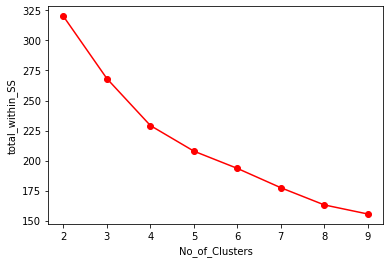

In [79]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

##### Selecting 4 clusters from the above scree plot which is the optimum number of clusters

In [80]:
model = KMeans(n_clusters = 4)
model.fit(df_norm)

KMeans(n_clusters=4)

In [81]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
hd['clust'] = mb # creating a  new column and assigning it to new column 
hd.head()

,clust,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,3,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,1,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
hd = hd.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12, 13]]
hd.head()

,target,clust,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,3,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1,3,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,1,1,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,1,1,57,0,0,120,354,0,1,163,1,0.6,2,0,2


##### In the both case senario's the optimal no. of clusters are different

#####  * The reason behind the different results yeilded in R and Python code is because, In R code, for rescaling of data, I used Normalization method. While in Python code the rescaling is done by using Standaradization method.

Normalization typically means rescales the values into a range of [0,1]. Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).

### Conclusion:

In this study the performance of clustering algorithms with PCA method was analysed on heart disease dataset. The experimental result show that, PCA improves the performance of clustering methods. In addition, using dimension reduction of PCA is important to visualize data in higher dimensional datasets in clustering problems We managedto classify the  dataset with 91% based on Hierarchieal and K-means via PCA clustering technique which are satisfying. 